# Método del Gradiente Conjugado


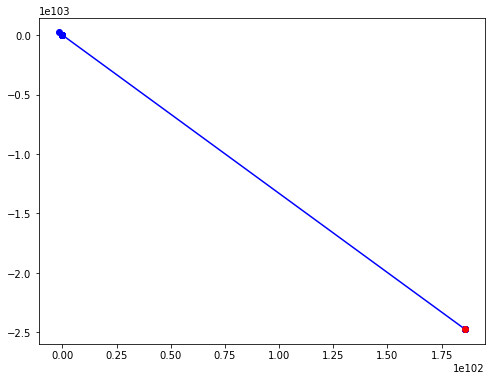

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función
def f(x, y):
    return -(4*x**2) - (57*y**2) + 4*x*y - 8*x + 10*y - 2

# Definir el gradiente de la función
def grad_f(x, y):
    return np.array([-8*x + 4*y - 8, -114*y + 4*x + 10])

# Definir el método del gradiente conjugado
def conjugate_gradient(point, max_iter=1000, tol=1e-6):
    # Inicializar los vectores de búsqueda y gradiente
    d = -grad_f(point[0], point[1])
    g = d
    # Inicializar el contador de iteraciones
    iter = 0
    # Inicializar el historial de puntos para graficar la trayectoria
    path = [point]
    # Iterar hasta alcanzar el máximo de iteraciones o la tolerancia
    while iter < max_iter and np.linalg.norm(g) > tol:
        # Calcular el tamaño de paso óptimo
        alpha = np.dot(g, g) / np.dot(d, grad_f(point[0], point[1]))
        # Actualizar el punto y el gradiente
        point = point + alpha * d
        g_new = grad_f(point[0], point[1])
        # Calcular el coeficiente de corrección beta
        beta = np.dot(g_new, g_new) / np.dot(g, g)
        # Actualizar el vector de búsqueda
        d = -g_new + beta * d
        g = g_new
        # Actualizar el contador de iteraciones y el historial de puntos
        iter += 1
        path.append(point)
    # Devolver el punto crítico y la trayectoria
    return point, path

# Definir los parámetros del método
point = np.array([2, -5]) # Punto semilla
max_iter = 1000 # Máximo de iteraciones
tol = 1e-6 # Tolerancia

# Ejecutar el método del gradiente conjugado
critical_point, path = conjugate_gradient(point, max_iter=max_iter, tol=tol)

# Crear la figura
fig, ax = plt.subplots(figsize=(8, 6))

# Crear la malla de puntos para graficar la función
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Graficar la función
ax.contour(X, Y, Z, levels=20, cmap='coolwarm')

# Graficar la trayectoria
ax.plot([p[0] for p in path], [p[1] for p in path], 'bo-')

# Mostrar el punto crítico en la gráfica
ax.plot(critical_point[0], critical_point[1], 'ro')

# Mostrar la gráfica
plt.show()
